<a href="https://colab.research.google.com/github/NamanGautam0404/NG.pro/blob/main/Image_Classification_on_MNIST_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Training images shape: (60000, 28, 28)
Training labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)
Epoch 1/5
1875/1875 [==============================] - 54s 28ms/step - loss: 0.1416 - accuracy: 0.9565 - val_loss: 0.0564 - val_accuracy: 0.9828
Epoch 2/5
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0468 - accuracy: 0.9855 - val_loss: 0.0429 - val_accuracy: 0.9864
Epoch 3/5
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0338 - accuracy: 0.9894 - val_loss: 0.0503 - val_accuracy: 0.9816
Epoch 4/5
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0268 - accuracy: 0.9919 - val_loss: 0.0295 - val_accuracy: 0.9899
Epoch 5/5
313/313 [==============================] - 2s 7ms/step - loss: 0.0338 - accuracy: 0.9900
Test accuracy: 0.9900000095367432


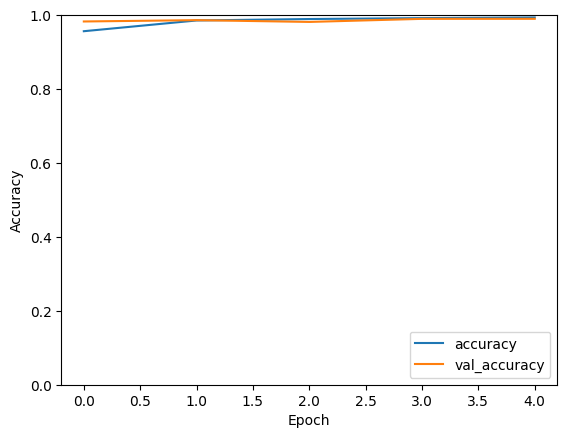

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

print("Training images shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)


train_images, test_images = train_images / 255.0, test_images / 255.0


train_images = np.expand_dims(train_images, axis=-1) #expanding images
test_images = np.expand_dims(test_images, axis=-1)

# CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))


test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)


plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()
